<a href="https://colab.research.google.com/github/BrunoMarins/puc_data_science/blob/main/MVP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP3 – Engenharia de Dados
# Aluno: Bruno Marins Soares

## 1) Objetivo
Avaliar qual a melhor estratégia de investimento para acúmulo de patrimônio no longo prazo com base em dados históricos de desempenho dos títulos do tesouro brasileiro. Perguntas:
- Quais títulos mais variam numa estratégia de marcação a mercado (tentar comprar na baixa e vender na alta em função dos ciclos da taxa de juros)?
- É mais rentável segurar um título até o vencimento ou fazer marcação a mercado aportando em tesouro Selic nos períodos de queda?

## 2) Coleta de dados
Encontramos os dados necessários nos sites do Tesouro Direto (https://www.tesourodireto.com.br/titulos/historico-de-precos-e-taxas.htm):

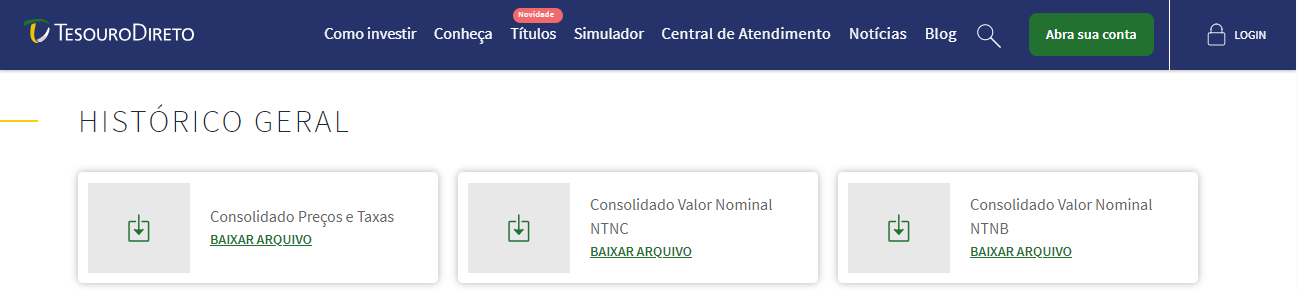

Os dados dos títulos (PrecoTaxaTesouroDireto.csv) foram baixados para máquina local e inseridos manualmente em um *bucket* (serviço de armazenamento) no *Amazon* S3:

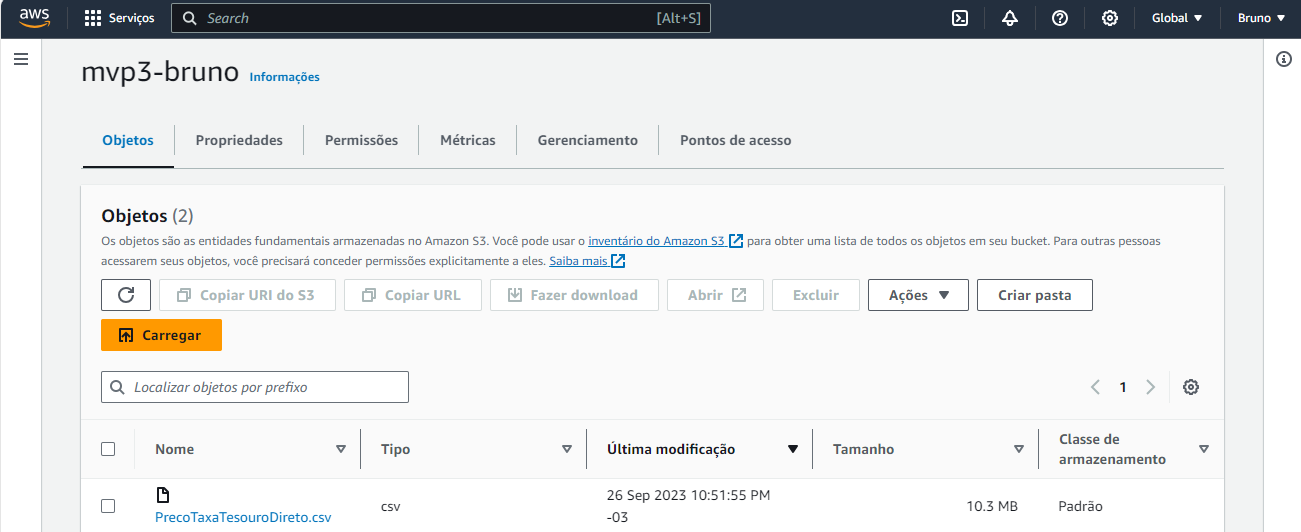

Obs.: foi necessário criar uma VPC (*Virtual Private Cloud*) selecionando a rota disponível para conexão posterior com outras ferramentas AWS.

## 3) Modelagem


A arquiterura do sistema é representada a seguir:

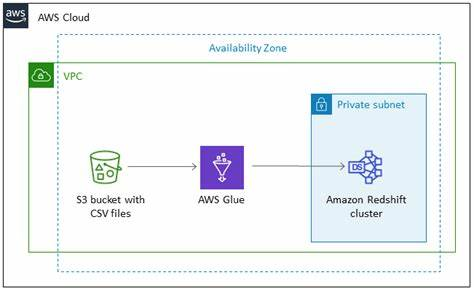

Como foi necessária apenas uma tabela para solução do problema, podemos considerá-la como parte de um modelo de dados *flat* disponibilizados num *data lake*. Apresentamos as características da tabela a seguir, como detalhamento do modelo:

1. Coluna A – Tipo Titulo
a. Descrição: Tipo do título do Tesouro Direto
b. Formato: Campo de texto
c. Tamanho: Até 50 posições
d. Domínio: Tesouro Selic, Tesouro Prefixado, Tesouro Prefixado com Juros Semestrais, Tesouro IPCA+,
Tesouro IPCA+ com Juros Semestrais, Tesouro IGP-M + com Juros Semestrais;
2. Coluna B – Data Vencimento a. Descrição: Data de vencimento do título
b. Formato: Data
c. Tamanho: DD/MM/YYYY
3. Coluna C – Data Base a. Descrição: Data base à qual os preços e taxas se referem
b. Formato: Data
c. Tamanho: DD/MM/YYYY
4. Coluna D - Taxa Compra Manha a. Descrição: Taxa disponível para o investidor comprar o título
b. Formato: percentual
c. Tamanho: duas casas após a vírgula
5. Coluna E – Taxa Venda Manha a. Descrição: Taxa disponível para o investidor revender o título para o TN. A taxa venda sempre é um
pouco maior que a taxa compra para resguardar o TN das oscilações que ocorrem entre uma precificação
e outra
b. Formato: percentual
c. Tamanho: duas casas após a vírgula.
6. Coluna F – PU Compra Manha a. Descrição: é o preço do título, considerando a taxa de compra manhã, com liquidação para o próximo
dia útil (D+1). Quanto maior a taxa, menor o preço e vice-versa
b. Formato: Campo monetário. Milhares separados por ponto e centavos separados por vírgula.
7. Coluna G – PU Venda Manha a. Descrição: é o preço do título, considerando a taxa de venda manhã, com liquidação para o próximo dia
útil (D+1)
b. Formato: Campo monetário. Milhares separados por ponto e centavos separados por vírgula.
8. Coluna H – PU Base Manha a. Descrição: é o preço do título, considerando a taxa de venda manhã, com liquidação para o mesmo dia
(D0). Este PU valoriza os títulos para marcar a mercado os títulos adquiridos no Tesouro Direto
b. Formato: Campo monetário. Milhares separados por ponto e centavos separados por vírgula.

## 4) Carga

Criou-se um *cluster* AWS *Redshift* para armazenar tabelas SQL e realizar consultas após o processo de ETL (*extract, transform and load*)
realizado no AWS Glue:

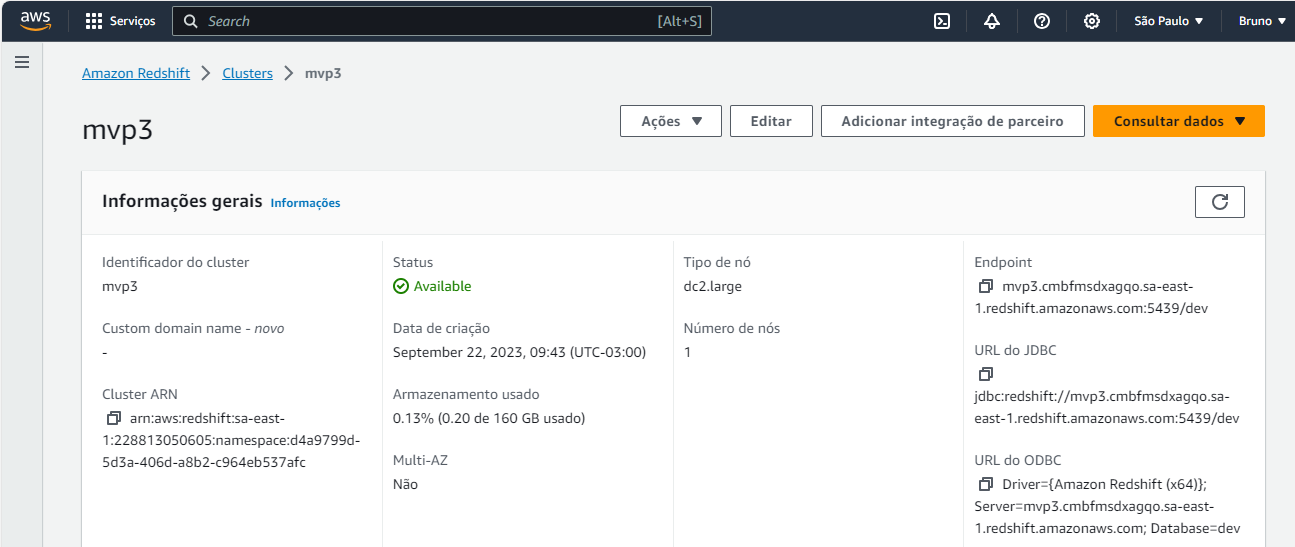

O ETL foi realizado utilizando o serviço AWS Glue. Através de sua interface visual foram criadas as seguintes etapas:


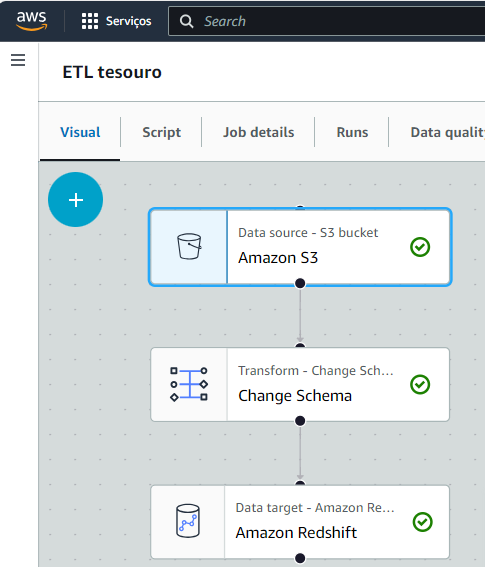

Na etapa 1, "Data source - S3 bucket", foram realizadas as configurações para extrair (*extract*) os dados da fonte, no caso do csv "PrecoTaxaTesouroDireto" do bucket "mvp3-bruno":

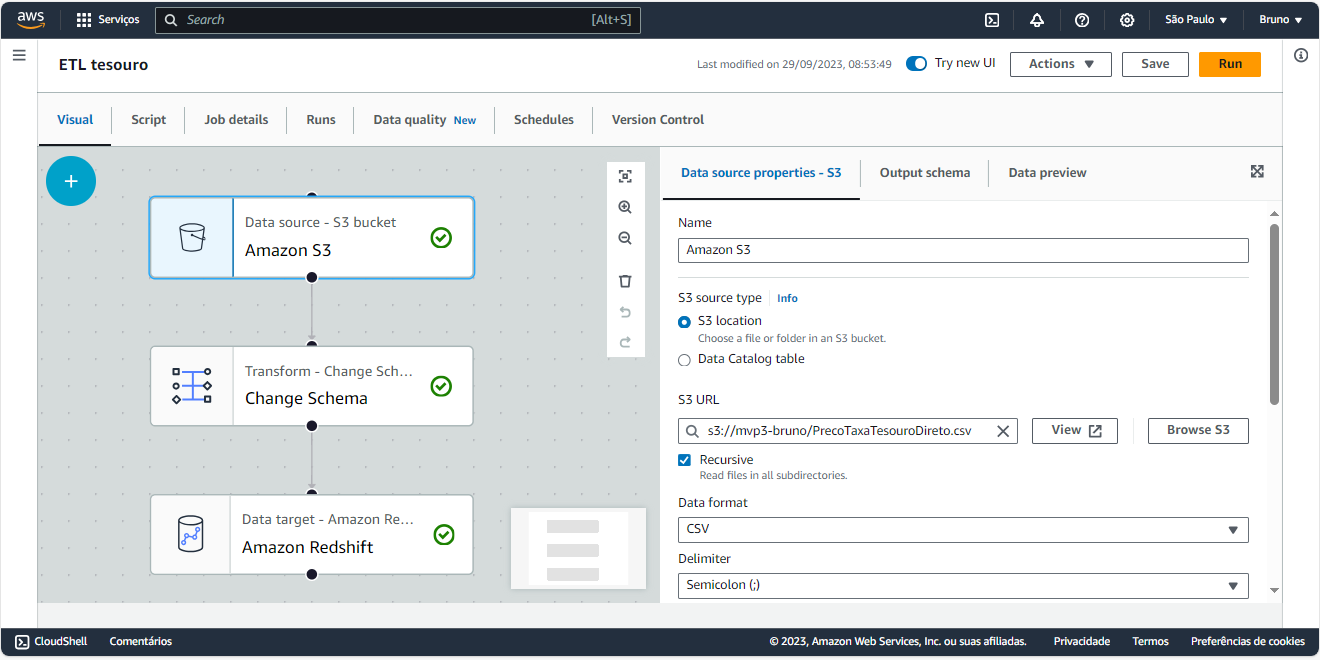

Na etapa 2, "Transform - Change Schema", realizamos a etapa de transformação (*transform*) dos dados, retirando campos desnecessários e renomeando e convertendo os tipos dos demais conforme imagem a seguir:

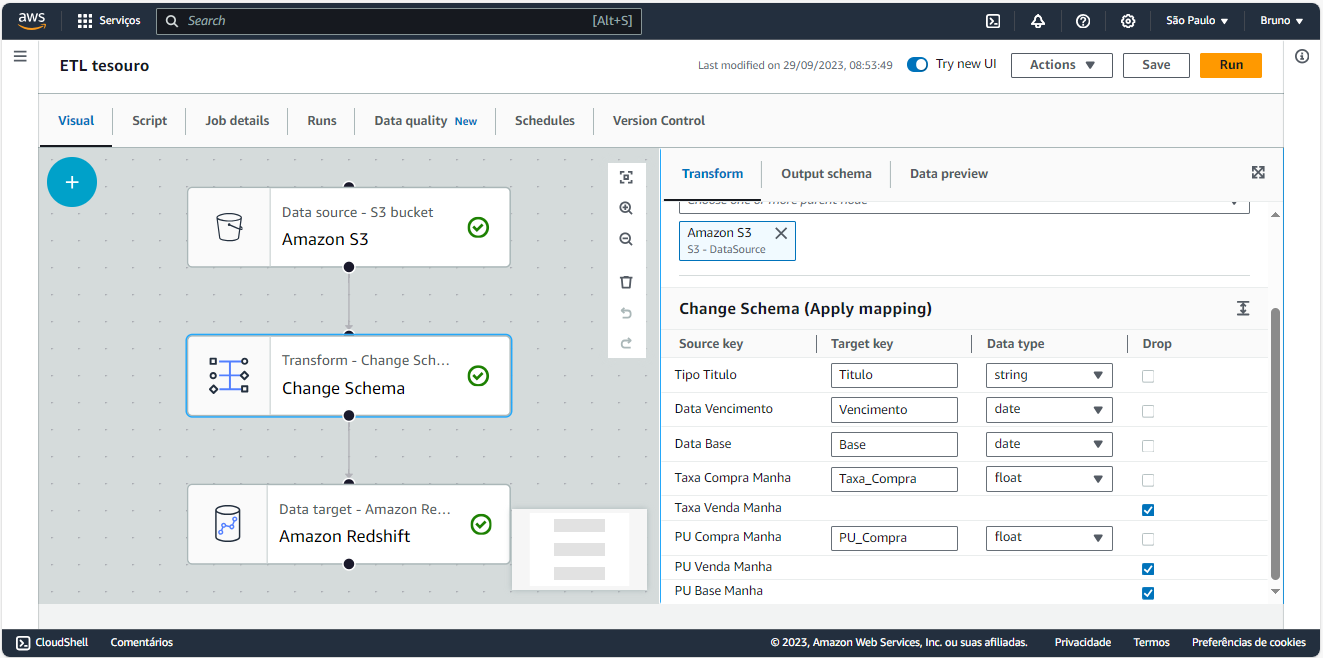

Já na terceira etapa, "Data target - Amazon Redshift", configuramos os parâmetros necessários para o carregamento (*load*) dos dados transformados no nosso banco de dados:


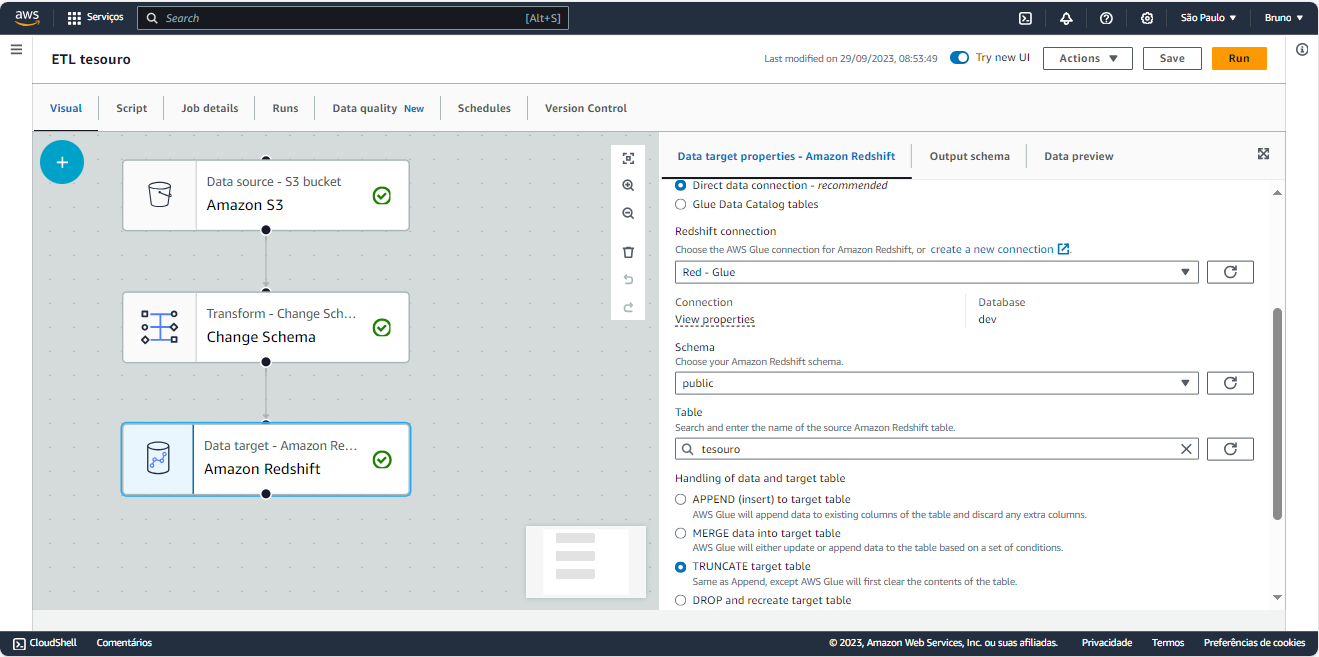

## 5) Análise

### 5.1) Qualidade dos dados

Com a tabela criada no AWS Redshift, fizemos a verificação da integridade e qualidade dos dados:

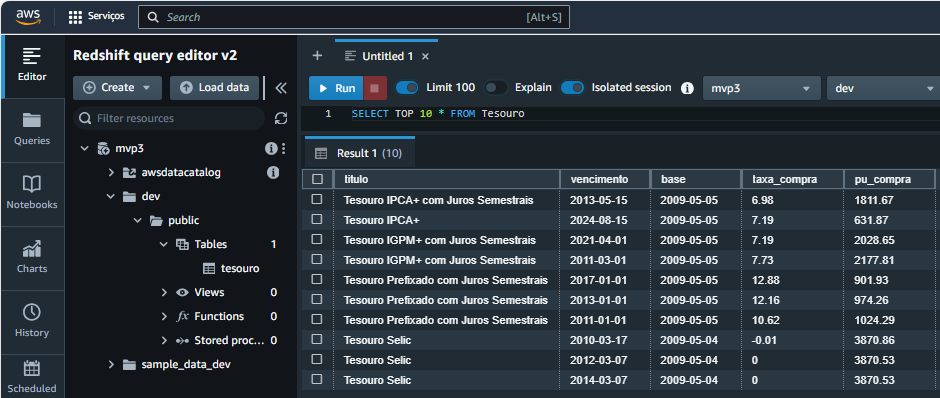

Verificando nulos:

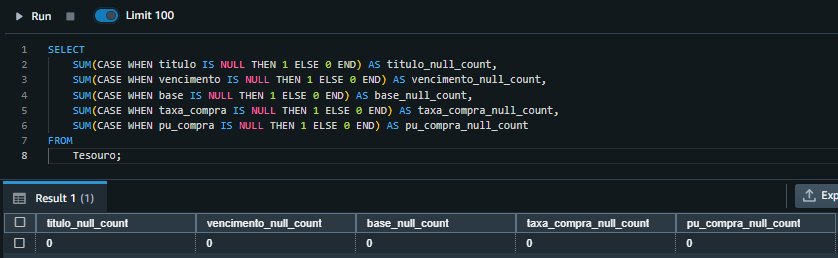

### 5.2) Solução

Respondendo as perguntas estabelecidas no objetivo:

- Quais títulos mais variam numa estratégia de marcação a mercado (tentar comprar na baixa e vender na alta em função dos ciclos da taxa de juros)?

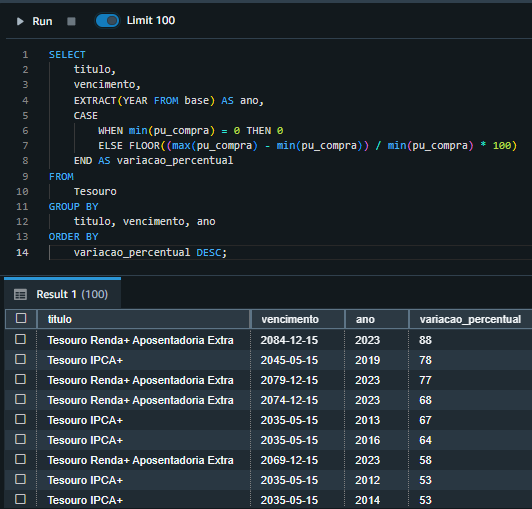

Como o "Tesouro Renda+ Aposentadoria Extra" é um tipo de título muito recente (criado em 2023), vamos desconsiderá-lo para fins de análise histórica. Logo, observamos que o "Tesouro IPCA+" (sem pagamento de juros semestrais) de longo vencimento se mostra o mais volátil.

- É mais rentável segurar um título até o vencimento ou fazer marcação a mercado aportando em tesouro Selic nos períodos de queda?

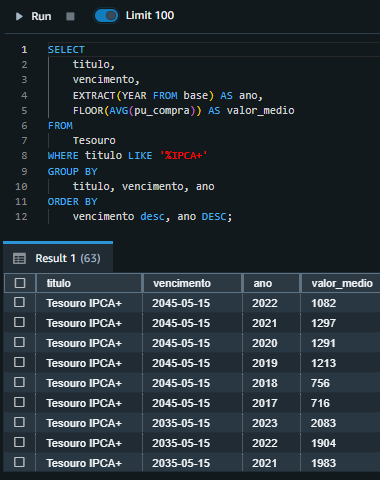

Notamos que houve queda do valor médio dos títulos "IPCA+ 2045" e "IPCA+ 2035" entre 2021 e 2022.

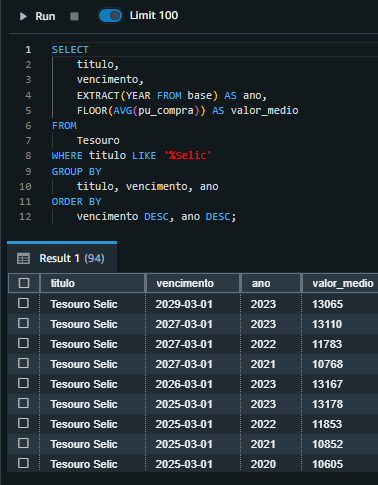

Comparando os anos de queda do valor médio dos títulos "IPCA+ 2045" e "IPCA+ 2035" (ex.: 2021 para 2022) com a evolução sempre positiva do mesmo título "Selic" (vide ano de vencimento), concluímos que é vantajoso migrar para este em momentos de queda dos demais ao invés de manter-se neles até o vencimento.

## 6) Conclusão

Neste trabalho:

- Traçamos de forma clara e objetiva o problema a ser resolvido e as perguntas de negócio a serem respondidas;
- Documentamos a coleta do conjunto de dados e garantimos a persistência do mesmo numa plataforma de nuvem;
- Apresentamos a modelagem e catalogação dos dados;
- Documentamos objetivamente a carga dos dados e garantimos a persistência dos dados na plataforma de nuvem após a carga;
- Verificamos a qualidade dos dados;
- Obtivemos solução consistente com o problema;
- Confrontamos os resultados com as perguntas do objetivo;
- Entregamos clareza, objetividade e didática de forma geral.